# Machine Learning Project ISYARA: [Self Collected Dataset]


## Team Machine Learning ISYARA

- **Nama:** Rizka Alfadilla
- **Student ID:** MC299D5Y1776


- **Nama:** Davin Ghani Ananta Kusuma
- **Student ID:** MC299D5Y1599


- **Nama:** Nauval Gymnasti
- **Student ID:** MC299D5Y1716

## Packages/Library

In [1]:
# Tunggu hingga semua library terinstall baru restart session

!pip uninstall -y mediapipe yfinance thinc grpcio-status ydf protobuf numpy

!pip install protobuf==5.29.0
!pip install numpy==1.24.4
!pip install mediapipe==0.10.21
!pip install yfinance ydf --upgrade --no-deps
!pip install grpcio-status==1.71.0
!pip install tensorflowjs

Found existing installation: yfinance 0.2.61
Uninstalling yfinance-0.2.61:
  Successfully uninstalled yfinance-0.2.61
Found existing installation: thinc 8.3.6
Uninstalling thinc-8.3.6:
  Successfully uninstalled thinc-8.3.6
Found existing installation: grpcio-status 1.71.0
Uninstalling grpcio-status-1.71.0:
  Successfully uninstalled grpcio-status-1.71.0
Found existing installation: ydf 0.12.0
Uninstalling ydf-0.12.0:
  Successfully uninstalled ydf-0.12.0
Found existing installation: protobuf 5.29.5
Uninstalling protobuf-5.29.5:
  Successfully uninstalled protobuf-5.29.5
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Reason for being yanked: https://github.com/protocolbuffers/protobuf/issues/19430#issuecomment-2518458119
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 7.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the s

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 76.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.0
    Uninstalling protobuf-5.29.0:
      Successfully uninstalled protobuf-5.29.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.8.7 requires thinc<8.4.0,>=8.3.4, which is not installed.
tensorflow-decision-forests 1.11.0 requires ydf, which is not installed.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.9/117

In [1]:
# Library Umum
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from google.colab import files

In [2]:
# Machine Learning & Model Inference
import tensorflow as tf
import joblib
import mediapipe as mp

# Pelatihan dan evaluasi
import seaborn as sns
import tensorflowjs
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Mencetak versi TensorFlow yang sedang digunakan
print(f'Mediapipe Version: {mp.__version__}')
print(f'OpenCV Version: {cv2.__version__}')
print(f'Pandas Version: {pd.__version__}')
print(f'Numpy Version: {np.__version__}')
print(f'Scikit Learn Version: {sklearn.__version__}')
print(f'Tensorflow Version: {tf.__version__}')
print(f'Tensorflow JS Version: {tensorflowjs.__version__}')

Mediapipe Version: 0.10.21
OpenCV Version: 4.11.0
Pandas Version: 2.2.2
Numpy Version: 1.26.4
Scikit Learn Version: 1.6.1
Tensorflow Version: 2.18.0
Tensorflow JS Version: 4.22.0


In [4]:
# Menonaktifkan warning yang mungkin muncul
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Preparation

### Data Loading

In [12]:
df = pd.read_csv("BISINDO.csv")

df.head(10)

,label,left_0_x,left_0_y,left_0_z,left_1_x,left_1_y,left_1_z,left_2_x,left_2_y,left_2_z,...,right_17_z,right_18_x,right_18_y,right_18_z,right_19_x,right_19_y,right_19_z,right_20_x,right_20_y,right_20_z
0,A,0.0,0.0,0.0,0.052353,-0.001851,-0.015983,0.109125,-0.032288,-0.029845,...,-0.039954,-0.076909,-0.107583,-0.054763,-0.060059,-0.077820,-0.044745,-0.045451,-0.081359,-0.033953
1,A,0.0,0.0,0.0,0.071385,0.029404,-0.064012,0.158534,-0.004141,-0.096954,...,-0.082243,0.018257,-0.302015,-0.128856,0.024389,-0.214646,-0.108959,0.000209,-0.186805,-0.084503
2,A,0.0,0.0,0.0,0.076662,0.030123,-0.061914,0.166283,-0.006836,-0.091884,...,-0.086342,0.015011,-0.299711,-0.133864,0.021959,-0.213778,-0.115076,-0.003226,-0.183141,-0.091367
3,A,0.0,0.0,0.0,0.105771,-0.016295,-0.035706,0.218328,-0.126486,-0.059821,...,-0.089812,-0.073401,-0.317360,-0.119237,-0.063681,-0.234563,-0.094651,-0.037178,-0.243010,-0.068466
4,A,0.0,0.0,0.0,0.109859,-0.016909,-0.047401,0.216179,-0.106564,-0.089424,...,-0.083130,-0.055172,-0.312178,-0.117926,-0.056561,-0.224344,-0.095817,-0.035280,-0.220416,-0.069357
5,A,0.0,0.0,0.0,0.117179,-0.015229,-0.032903,0.235251,-0.133710,-0.049336,...,-0.082315,-0.060938,-0.309391,-0.113770,-0.054155,-0.223533,-0.089410,-0.031873,-0.230383,-0.062170
6,A,0.0,0.0,0.0,0.101744,0.001485,-0.036054,0.220596,-0.083899,-0.061489,...,-0.084723,-0.077256,-0.344747,-0.115726,-0.077651,-0.253960,-0.087611,-0.044137,-0.254758,-0.057573
7,A,0.0,0.0,0.0,0.103014,0.005820,-0.046856,0.218572,-0.061027,-0.079206,...,-0.086406,-0.050364,-0.332953,-0.116397,-0.051729,-0.244316,-0.088715,-0.018776,-0.245067,-0.059455
8,A,0.0,0.0,0.0,0.094252,0.013592,-0.047352,0.203947,-0.035643,-0.082403,...,-0.092532,-0.022912,-0.345114,-0.125590,-0.034217,-0.253986,-0.094725,-0.002513,-0.247568,-0.061759
9,A,0.0,0.0,0.0,0.103947,-0.007693,-0.035176,0.217062,-0.109664,-0.058298,...,-0.086801,-0.085232,-0.346883,-0.111270,-0.082525,-0.255959,-0.081330,-0.048325,-0.256686,-0.052938


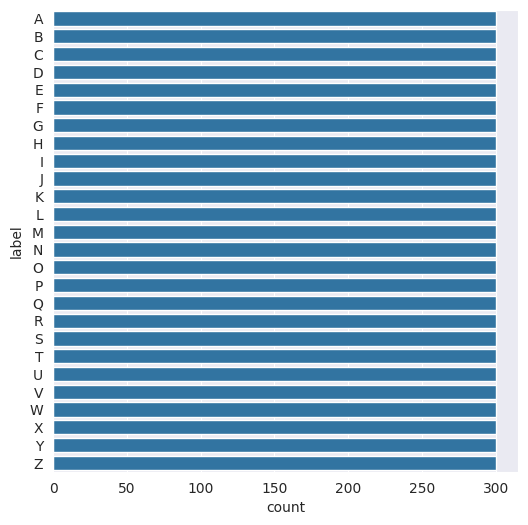

In [13]:
# Plot distribusi gambar di setiap kelas
Label = df['label']
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

In [14]:
df['label'].value_counts()

,count
label,
A,300
B,300
C,300
D,300
E,300
F,300
G,300
H,300
I,300


### Data Preprocessing

#### Split Dataset

In [16]:
def split_train_test(csv_filename, train_file, test_file, train_size=0.8):
    # Load dataset
    df = pd.read_csv(csv_filename)

    # Pisahkan fitur dan label
    X = df.drop(columns=['label'])
    y = df['label']

    # Split dataset menjadi train dan test
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, stratify=y, random_state=42)

    # Buat DataFrame untuk masing-masing set
    train_df = pd.concat([y_train, X_train], axis=1)
    test_df = pd.concat([y_test, X_test], axis=1)

    # Simpan ke file CSV
    train_df.to_csv(train_file, index=False)
    test_df.to_csv(test_file, index=False)

    print(f"Dataset dibagi menjadi:")
    print(f"Train Set: {train_df.shape[0]} sampel")
    print(f"Test Set: {test_df.shape[0]} sampel")

split_train_test('BISINDO.csv', 'train.csv', 'test.csv')

Dataset dibagi menjadi:
Train Set: 6240 sampel
Test Set: 1560 sampel


## Modelling

In [17]:
# Parameter
input_dim = 126  # 42 x 3 (x, y, z) untuk Left dan Right
epochs = 100
batch_size = 32
checkpoint_dir = './checkpoints'
saved_model_cnn_dir = './saved_models_cnn'
saved_model_dnn_dir = './saved_models_dnn'

# Pastikan folder ada
os.makedirs(checkpoint_dir, exist_ok=True)
os.makedirs(saved_model_cnn_dir, exist_ok=True)
os.makedirs(saved_model_dnn_dir, exist_ok=True)

# Load Dataset
def load_dataset(train_file, test_file):
    train_df = pd.read_csv(train_file)
    test_df = pd.read_csv(test_file)

    X_train = train_df.drop(columns=['label']).values
    y_train = train_df['label'].values

    X_test = test_df.drop(columns=['label']).values
    y_test = test_df['label'].values

    # Encode labels
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    return X_train, y_train, X_test, y_test, label_encoder

# Load data
X_train, y_train, X_test, y_test, label_encoder = load_dataset('train.csv', 'test.csv')

# Simpan LabelEncoder
joblib.dump(label_encoder, "label_encoder.pkl")
print("Label encoder berhasil dibuat dan disimpan.")

# Reshape untuk CNN 1D
X_train_cnn = X_train.reshape((X_train.shape[0], input_dim, 1))
X_test_cnn = X_test.reshape((X_test.shape[0], input_dim, 1))

num_classes = len(label_encoder.classes_)

Label encoder berhasil dibuat dan disimpan.


In [18]:
# --- CNN 1D Model ---
def create_cnn_model(input_shape, num_classes):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# --- DNN Model ---
def create_dnn_model(input_dim, num_classes):
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(input_dim,)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [19]:
# --- Callback untuk CNN ---
cnn_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(checkpoint_dir, 'best_model_cnn.h5'),
        monitor='val_accuracy', save_best_only=True, verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    tf.keras.callbacks.TensorBoard(log_dir='./logs/cnn')
]

# --- Callback untuk DNN ---
dnn_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(checkpoint_dir, 'best_model_dnn.h5'),
        monitor='val_accuracy', save_best_only=True, verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    tf.keras.callbacks.TensorBoard(log_dir='./logs/dnn')
]

In [20]:
# --- Training CNN 1D ---
cnn_model = create_cnn_model((input_dim, 1), num_classes)
print("\nTraining CNN 1D...")
cnn_history = cnn_model.fit(
    X_train_cnn, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test_cnn, y_test),
    callbacks=cnn_callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN 1D...
Epoch 1/100
181/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2757 - loss: 2.3761
Epoch 1: val_accuracy improved from -inf to 0.87564, saving model to ./checkpoints/best_model_cnn.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.2919 - loss: 2.3191 - val_accuracy: 0.8756 - val_loss: 0.4674 - learning_rate: 0.0010
Epoch 2/100
185/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8089 - loss: 0.5702
Epoch 2: val_accuracy improved from 0.87564 to 0.95321, saving model to ./checkpoints/best_model_cnn.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8103 - loss: 0.5660 - val_accuracy: 0.9532 - val_loss: 0.2464 - learning_rate: 0.0010
Epoch 3/100
185/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9127 - loss: 0.2787
Epoch 3: val_accuracy improved from 0.95321 to 0.97436, saving model to ./checkpoints/best_model_cnn.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9134 - loss: 0.2767 - val_accuracy: 0.9744 - val_loss: 0.1347 - learning_rate: 0.0010
Epoch 4/100
192/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9436 - loss: 0.1827
Epoch 4: val_accuracy improved from 0.97436 to 0.97821, saving model to ./checkpoints/best_model_cnn.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9436 - loss: 0.1826 - val_accuracy: 0.9782 - val_loss: 0.1225 - learning_rate: 0.0010
Epoch 5/100
193/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9543 - loss: 0.1438
Epoch 5: val_accuracy did not improve from 0.97821
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9544 - loss: 0.1437 - val_accuracy: 0.9776 - val_loss: 0.0966 - learning_rate: 0.0010
Epoch 6/100
194/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9634 - loss: 0.1077
Epoch 6: val_accuracy did not improve from 0.97821
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9634 - loss: 0.1078 - val_accuracy: 0.9769 - val_loss: 0.1009 - learning_rate: 0.0010
Epoch 7/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9676 - loss: 0.1072
Epoch 7: val_accuracy improved from 0.97821 to 0.98526, saving model to ./checkpoints/best_model_cnn.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9676 - loss: 0.1072 - val_accuracy: 0.9853 - val_loss: 0.0763 - learning_rate: 0.0010
Epoch 8/100
193/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9817 - loss: 0.0742
Epoch 8: val_accuracy did not improve from 0.98526
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9816 - loss: 0.0745 - val_accuracy: 0.9840 - val_loss: 0.0808 - learning_rate: 0.0010
Epoch 9/100
181/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9763 - loss: 0.0855
Epoch 9: val_accuracy did not improve from 0.98526
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9763 - loss: 0.0856 - val_accuracy: 0.9788 - val_loss: 0.0860 - learning_rate: 0.0010
Epoch 10/100
181/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9740 - loss: 0.0740
Epoch 10: val_accuracy did not improve from 0.98526
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9740 - loss: 0.0743 - val_accuracy: 0.9840 - val_loss: 0.0725 - learning_rate: 0.0010
Epoch 11/100
182/195

195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9767 - loss: 0.0697 - val_accuracy: 0.9891 - val_loss: 0.0659 - learning_rate: 0.0010
Epoch 12/100
192/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9826 - loss: 0.0569
Epoch 12: val_accuracy did not improve from 0.98910
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9826 - loss: 0.0569 - val_accuracy: 0.9878 - val_loss: 0.0625 - learning_rate: 0.0010
Epoch 13/100
193/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9816 - loss: 0.0546
Epoch 13: val_accuracy did not improve from 0.98910
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9816 - loss: 0.0547 - val_accuracy: 0.9891 - val_loss: 0.0670 - learning_rate: 0.0010
Epoch 14/100
189/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9869 - loss: 0.0487
Epoch 14: val_accuracy improved from 0.98910 to 0.98974, saving model to ./checkpoints/best_model_cnn.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9868 - loss: 0.0488 - val_accuracy: 0.9897 - val_loss: 0.0686 - learning_rate: 0.0010
Epoch 15/100
192/195 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9887 - loss: 0.0445
Epoch 15: val_accuracy did not improve from 0.98974
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9887 - loss: 0.0445 - val_accuracy: 0.9891 - val_loss: 0.0615 - learning_rate: 0.0010
Epoch 16/100
191/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9894 - loss: 0.0400
Epoch 16: val_accuracy did not improve from 0.98974
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9894 - loss: 0.0400 - val_accuracy: 0.9872 - val_loss: 0.0713 - learning_rate: 0.0010
Epoch 17/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9823 - loss: 0.0609
Epoch 17: val_accuracy did not improve from 0.98974
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9823 - loss: 0.0609 - val_accuracy: 0.9865 - val_loss: 0.0728 - learning_rate: 0.0010
Epoch 18/100
181

195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9900 - loss: 0.0367 - val_accuracy: 0.9923 - val_loss: 0.0629 - learning_rate: 5.0000e-04
Epoch 20/100
190/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9923 - loss: 0.0241
Epoch 20: val_accuracy did not improve from 0.99231
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9923 - loss: 0.0241 - val_accuracy: 0.9910 - val_loss: 0.0597 - learning_rate: 5.0000e-04
Epoch 21/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9921 - loss: 0.0218
Epoch 21: val_accuracy did not improve from 0.99231
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9921 - loss: 0.0218 - val_accuracy: 0.9917 - val_loss: 0.0574 - learning_rate: 5.0000e-04
Epoch 22/100
193/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9954 - loss: 0.0147
Epoch 22: val_accuracy did not improve from 0.99231
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9954 - loss: 0.0147 - val_accuracy: 0.9910 - val_loss: 0.0562 - learning_rate: 5.0000e-04


In [21]:
# --- Training DNN ---
dnn_model = create_dnn_model(input_dim, num_classes)
print("\nTraining DNN...")
dnn_history = dnn_model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=dnn_callbacks
)


Training DNN...
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


183/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3043 - loss: 2.5599
Epoch 1: val_accuracy improved from -inf to 0.77628, saving model to ./checkpoints/best_model_dnn.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3143 - loss: 2.5161 - val_accuracy: 0.7763 - val_loss: 0.8301 - learning_rate: 0.0010
Epoch 2/100
182/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7223 - loss: 0.8488
Epoch 2: val_accuracy improved from 0.77628 to 0.90000, saving model to ./checkpoints/best_model_dnn.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7254 - loss: 0.8400 - val_accuracy: 0.9000 - val_loss: 0.4214 - learning_rate: 0.0010
Epoch 3/100
183/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8455 - loss: 0.4974
Epoch 3: val_accuracy improved from 0.90000 to 0.92821, saving model to ./checkpoints/best_model_dnn.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8463 - loss: 0.4944 - val_accuracy: 0.9282 - val_loss: 0.2908 - learning_rate: 0.0010
Epoch 4/100
179/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8915 - loss: 0.3523
Epoch 4: val_accuracy improved from 0.92821 to 0.95385, saving model to ./checkpoints/best_model_dnn.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8925 - loss: 0.3500 - val_accuracy: 0.9538 - val_loss: 0.2102 - learning_rate: 0.0010
Epoch 5/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9279 - loss: 0.2614
Epoch 5: val_accuracy improved from 0.95385 to 0.96923, saving model to ./checkpoints/best_model_dnn.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9280 - loss: 0.2613 - val_accuracy: 0.9692 - val_loss: 0.1771 - learning_rate: 0.0010
Epoch 6/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9441 - loss: 0.2057
Epoch 6: val_accuracy improved from 0.96923 to 0.97564, saving model to ./checkpoints/best_model_dnn.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9441 - loss: 0.2056 - val_accuracy: 0.9756 - val_loss: 0.1308 - learning_rate: 0.0010
Epoch 7/100
180/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9596 - loss: 0.1644
Epoch 7: val_accuracy did not improve from 0.97564
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9594 - loss: 0.1644 - val_accuracy: 0.9750 - val_loss: 0.1282 - learning_rate: 0.0010
Epoch 8/100
182/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9627 - loss: 0.1413
Epoch 8: val_accuracy improved from 0.97564 to 0.97821, saving model to ./checkpoints/best_model_dnn.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9628 - loss: 0.1407 - val_accuracy: 0.9782 - val_loss: 0.1067 - learning_rate: 0.0010
Epoch 9/100
181/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9686 - loss: 0.1297
Epoch 9: val_accuracy improved from 0.97821 to 0.98013, saving model to ./checkpoints/best_model_dnn.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9686 - loss: 0.1291 - val_accuracy: 0.9801 - val_loss: 0.0999 - learning_rate: 0.0010
Epoch 10/100
190/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9751 - loss: 0.0969
Epoch 10: val_accuracy improved from 0.98013 to 0.98141, saving model to ./checkpoints/best_model_dnn.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9751 - loss: 0.0970 - val_accuracy: 0.9814 - val_loss: 0.0967 - learning_rate: 0.0010
Epoch 11/100
187/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9712 - loss: 0.1001
Epoch 11: val_accuracy improved from 0.98141 to 0.98397, saving model to ./checkpoints/best_model_dnn.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9714 - loss: 0.1000 - val_accuracy: 0.9840 - val_loss: 0.0840 - learning_rate: 0.0010
Epoch 12/100
194/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9773 - loss: 0.0924
Epoch 12: val_accuracy did not improve from 0.98397
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9773 - loss: 0.0923 - val_accuracy: 0.9821 - val_loss: 0.0833 - learning_rate: 0.0010
Epoch 13/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9859 - loss: 0.0647
Epoch 13: val_accuracy did not improve from 0.98397
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9858 - loss: 0.0647 - val_accuracy: 0.9840 - val_loss: 0.0792 - learning_rate: 0.0010
Epoch 14/100
179/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9811 - loss: 0.0788
Epoch 14: val_accuracy improved from 0.98397 to 0.98462, saving model to ./checkpoints/best_model_dnn.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9811 - loss: 0.0787 - val_accuracy: 0.9846 - val_loss: 0.0796 - learning_rate: 0.0010
Epoch 15/100
194/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9808 - loss: 0.0644
Epoch 15: val_accuracy improved from 0.98462 to 0.98654, saving model to ./checkpoints/best_model_dnn.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9808 - loss: 0.0644 - val_accuracy: 0.9865 - val_loss: 0.0745 - learning_rate: 0.0010
Epoch 16/100
184/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9884 - loss: 0.0485
Epoch 16: val_accuracy did not improve from 0.98654
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9882 - loss: 0.0490 - val_accuracy: 0.9846 - val_loss: 0.0721 - learning_rate: 0.0010
Epoch 17/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9860 - loss: 0.0580
Epoch 17: val_accuracy improved from 0.98654 to 0.98718, saving model to ./checkpoints/best_model_dnn.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9860 - loss: 0.0580 - val_accuracy: 0.9872 - val_loss: 0.0714 - learning_rate: 0.0010
Epoch 18/100
193/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9830 - loss: 0.0610
Epoch 18: val_accuracy did not improve from 0.98718
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9831 - loss: 0.0610 - val_accuracy: 0.9853 - val_loss: 0.0719 - learning_rate: 0.0010
Epoch 19/100
189/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9880 - loss: 0.0526
Epoch 19: val_accuracy did not improve from 0.98718
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9880 - loss: 0.0526 - val_accuracy: 0.9853 - val_loss: 0.0800 - learning_rate: 0.0010
Epoch 20/100
189/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9887 - loss: 0.0457
Epoch 20: val_accuracy did not improve from 0.98718

Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9887 - loss: 0.0457 - va

195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9877 - loss: 0.0503 - val_accuracy: 0.9878 - val_loss: 0.0634 - learning_rate: 5.0000e-04
Epoch 22/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9903 - loss: 0.0341
Epoch 22: val_accuracy improved from 0.98782 to 0.98974, saving model to ./checkpoints/best_model_dnn.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9903 - loss: 0.0341 - val_accuracy: 0.9897 - val_loss: 0.0622 - learning_rate: 5.0000e-04
Epoch 23/100
188/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9912 - loss: 0.0323
Epoch 23: val_accuracy did not improve from 0.98974
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9912 - loss: 0.0323 - val_accuracy: 0.9878 - val_loss: 0.0639 - learning_rate: 5.0000e-04
Epoch 24/100
191/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9896 - loss: 0.0374
Epoch 24: val_accuracy did not improve from 0.98974
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9897 - loss: 0.0374 - val_accuracy: 0.9885 - val_loss: 0.0614 - learning_rate: 5.0000e-04
Epoch 25/100
192/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9919 - loss: 0.0306
Epoch 25: val_accuracy did not improve from 0.98974
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9919 - loss: 0.0307 - val_accuracy: 0.9878 - val_loss: 0.0675 - learning_rate: 5.0000e-04


## Evaluation and Visualization

In [22]:
print("\nEvaluating CNN 1D Model:")
cnn_loss, cnn_acc = cnn_model.evaluate(X_test_cnn, y_test)
cnn_train_acc = cnn_history.history['accuracy'][-1]
print(f"Train Accuracy (CNN 1D): {cnn_train_acc:.4f}")
print(f"Test Accuracy (CNN 1D): {cnn_acc:.4f}")

# Classification Report
y_pred_cnn = cnn_model.predict(X_test_cnn).argmax(axis=1)
print("\nClassification Report (CNN 1D):")
print(classification_report(y_test, y_pred_cnn, target_names=label_encoder.classes_))


Evaluating CNN 1D Model:
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9928 - loss: 0.0701
Train Accuracy (CNN 1D): 0.9958
Test Accuracy (CNN 1D): 0.9910
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

Classification Report (CNN 1D):
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        60
           B       1.00      0.93      0.97        60
           C       0.97      1.00      0.98        60
           D       1.00      1.00      1.00        60
           E       1.00      1.00      1.00        60
           F       0.94      0.98      0.96        60
           G       1.00      1.00      1.00        60
           H       1.00      1.00      1.00        60
           I       1.00      1.00      1.00        60
           J       1.00      1.00      1.00        60
           K       1.00      1.00      1.00        60
           L       1.00      0.97      0.98        60
           M       0.95      0.95      0.95        60
         

In [23]:
print("\nEvaluating DNN Model:")
dnn_loss, dnn_acc = dnn_model.evaluate(X_test, y_test)
dnn_train_acc = dnn_history.history['accuracy'][-1]
print(f"Train Accuracy (DNN): {dnn_train_acc:.4f}")
print(f"Test Accuracy (DNN): {dnn_acc:.4f}")

# Classification Report
y_pred_dnn = dnn_model.predict(X_test).argmax(axis=1)
print("\nClassification Report (DNN):")
print(classification_report(y_test, y_pred_dnn, target_names=label_encoder.classes_))


Evaluating DNN Model:
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9903 - loss: 0.0701
Train Accuracy (DNN): 0.9942
Test Accuracy (DNN): 0.9897
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Classification Report (DNN):
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        60
           B       1.00      0.95      0.97        60
           C       0.95      0.98      0.97        60
           D       1.00      1.00      1.00        60
           E       1.00      1.00      1.00        60
           F       0.95      0.98      0.97        60
           G       1.00      1.00      1.00        60
           H       1.00      1.00      1.00        60
           I       1.00      1.00      1.00        60
           J       1.00      1.00      1.00        60
           K       1.00      0.98      0.99        60
           L       1.00      0.97      0.98        60
           M       0.95      0.97      0.96        60
           N       0.

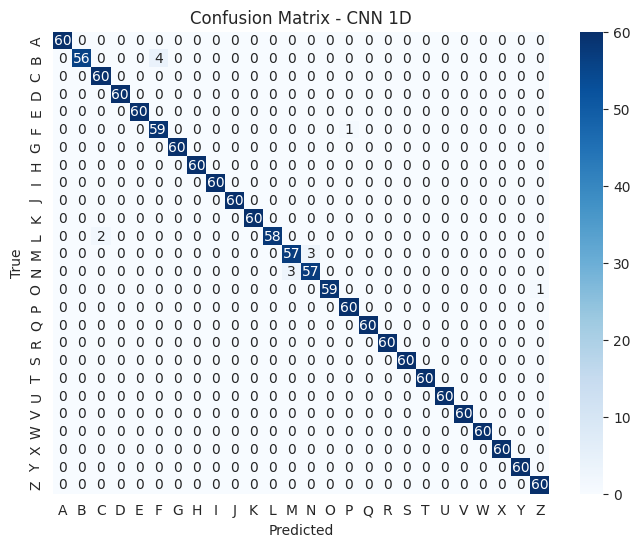

In [24]:
# --- Confusion Matrix (CNN 1D) ---
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - CNN 1D')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

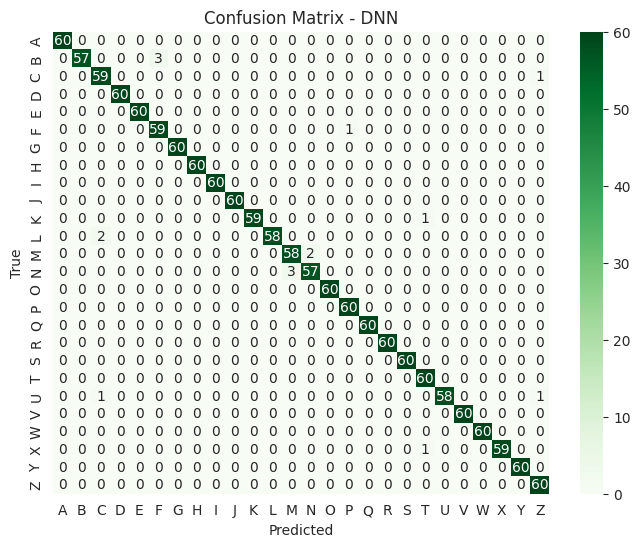

In [25]:
# --- Confusion Matrix (DNN) ---
cm_dnn = confusion_matrix(y_test, y_pred_dnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dnn, annot=True, fmt='d', cmap='Greens',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - DNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

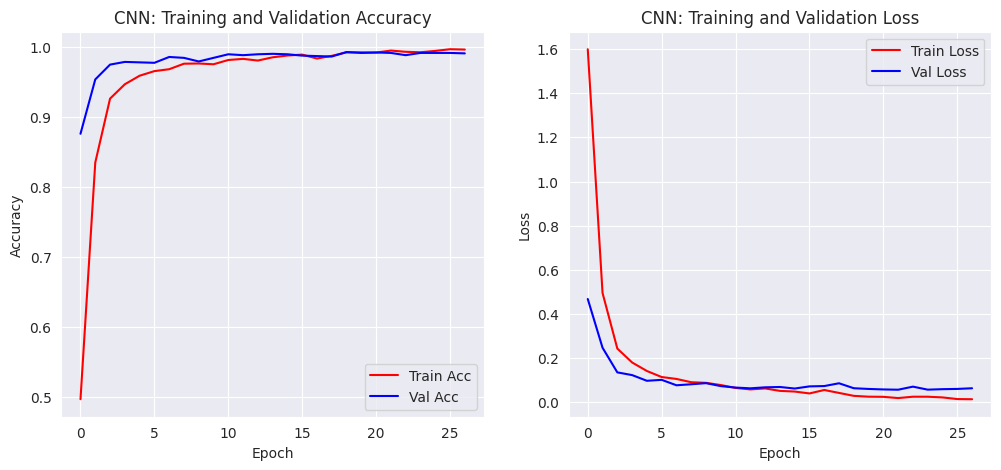

In [26]:
# --- Plot Akurasi dan Loss CNN ---
acc = cnn_history.history['accuracy']
val_acc = cnn_history.history['val_accuracy']
loss = cnn_history.history['loss']
val_loss = cnn_history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'r', label='Train Acc')
plt.plot(epochs_range, val_acc, 'b', label='Val Acc')
plt.title('CNN: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'r', label='Train Loss')
plt.plot(epochs_range, val_loss, 'b', label='Val Loss')
plt.title('CNN: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

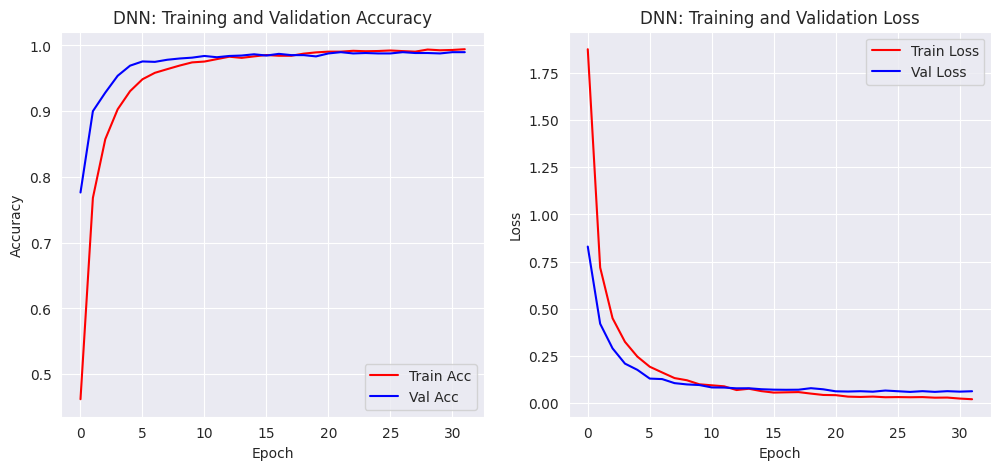

In [27]:
# --- Plot Akurasi dan Loss DNN ---
acc = dnn_history.history['accuracy']
val_acc = dnn_history.history['val_accuracy']
loss = dnn_history.history['loss']
val_loss = dnn_history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'r', label='Train Acc')
plt.plot(epochs_range, val_acc, 'b', label='Val Acc')
plt.title('DNN: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'r', label='Train Loss')
plt.plot(epochs_range, val_loss, 'b', label='Val Loss')
plt.title('DNN: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model Conversion

### SavedModel (TensorFlow)

In [28]:
tf.saved_model.save(cnn_model, saved_model_cnn_dir)

In [29]:
shutil.make_archive('saved_models_cnn', 'zip', 'saved_models_cnn')
from google.colab import files
files.download('saved_models_cnn.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
tf.saved_model.save(dnn_model, saved_model_dnn_dir)

In [42]:
shutil.make_archive('saved_models_dnn', 'zip', 'saved_models_dnn')
from google.colab import files
files.download('saved_models_dnn.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### TensorFlow.js (TFJS)

In [32]:
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    /content/saved_models_cnn/ \
    /content/cnn_tfjs_model

2025-06-04 04:45:01.142871: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749012301.162059    3235 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749012301.167911    3235 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-06-04 04:45:05.826095: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1749012305.826285    3235 gpu_device.cc:2022] Created device /job:localhost/replica:0/task

In [33]:
shutil.make_archive('cnn_tfjs_model', 'zip', 'cnn_tfjs_model')
files.download('cnn_tfjs_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    /content/saved_models_dnn/ \
    /content/dnn_tfjs_model

2025-06-04 04:45:16.629800: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749012316.650537    3332 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749012316.656476    3332 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-06-04 04:45:20.723864: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1749012320.724038    3332 gpu_device.cc:2022] Created device /job:localhost/replica:0/task

In [35]:
shutil.make_archive('dnn_tfjs_model', 'zip', 'dnn_tfjs_model')
files.download('dnn_tfjs_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>





## Inference

### How to Run Inference

---

### 1. Persiapan File dan Folder

* Pastikan file berikut ada di folder kerja Google Colab:

  * `label_encoder.pkl` — file label encoder hasil training.
  * Folder model CNN (`saved_models_cnn/`) yang berisi model TensorFlow SavedModel untuk CNN.
  * Folder model DNN (`saved_models_dnn/`) yang berisi model TensorFlow SavedModel untuk DNN.

---

### 2. Pastikan LIBRARY dan FUNGSI  ada

* Jalankan sel `Packages/Library` untuk install semua package dan library yang diperlukan.
* Jalankan sel `YOU MUST RUN THIS` untuk ekraksi landmark.

---

### 3. Install Dependencies

* Jalankan sel `Script Inference` secara berurutan.
* Pilih gambar yang berisi 1 atau 2 tangan yang ingin kamu inferensikan.
* Tunggu hasil prediksi muncul di output.

---

### 4. Tips & Troubleshooting

* Jika muncul error file tidak ditemukan, cek kembali apakah file model dan label encoder sudah diupload dan path sudah benar.
* Jika landmark tidak terdeteksi, coba gunakan gambar tangan dengan posisi dan pencahayaan lebih baik.
* Pastikan fungsi `extract_landmarks()` sesuai output yang diharapkan.

##### YOU MUST RUN THIS

In [36]:
# Inisialisasi MediaPipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Fungsi normalisasi landmark berdasarkan pergeseran dari pergelangan tangan (wrist)
def normalize_landmarks(landmarks, wrist):
    return [[lm[0] - wrist[0], lm[1] - wrist[1], lm[2] - wrist[2]] for lm in landmarks]

# Fungsi ekstraksi landmark dari gambar berdasarkan mode (one hand / two hands)
def extract_landmarks(image, is_one_hand):
    with mp_hands.Hands(static_image_mode=True, max_num_hands=2) as hands:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = hands.process(image_rgb)

        if is_one_hand:
            if not results.multi_hand_landmarks:
                return None  # Tidak ada tangan terdeteksi

            # Ambil satu tangan dan normalisasi
            landmarks = [[lm.x, lm.y, lm.z] for lm in results.multi_hand_landmarks[0].landmark]
            wrist = landmarks[0]
            normalized = normalize_landmarks(landmarks, wrist)

            left_hand = [0.0] * 63  # 21 titik x 3 dimensi
            right_hand = [coord for lm in normalized for coord in lm]
            return left_hand + right_hand

        else:  # Mode dua tangan
            if not results.multi_hand_landmarks or len(results.multi_hand_landmarks) != 2:
                return None  # Harus ada 2 tangan

            left_hand = None
            right_hand = None

            for idx, hand_landmarks in enumerate(results.multi_hand_landmarks):
                hand_label = results.multi_handedness[idx].classification[0].label
                landmarks = [[lm.x, lm.y, lm.z] for lm in hand_landmarks.landmark]
                wrist = landmarks[0]
                normalized = normalize_landmarks(landmarks, wrist)

                if hand_label == "Left":
                    left_hand = [coord for lm in normalized for coord in lm]
                elif hand_label == "Right":
                    right_hand = [coord for lm in normalized for coord in lm]

            if left_hand is None or right_hand is None:
                return None  # Harus dua tangan dengan label jelas

            return left_hand + right_hand

### Script Inference

In [37]:
# Load encoder dan model
label_encoder = joblib.load('label_encoder.pkl')
cnn_model = tf.keras.layers.TFSMLayer('./saved_models_cnn', call_endpoint='serving_default')
dnn_model = tf.keras.layers.TFSMLayer('./saved_models_dnn', call_endpoint='serving_default')

In [38]:
# Fungsi untuk menampilkan gambar
def display_image(image):
    print()
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8,6))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title("Gambar yang Diupload")
    plt.show()

In [39]:
# Fungsi untuk prediksi gesture berdasarkan landmark vector
def predict_gesture(landmark_vector):
    X_flat = np.array(landmark_vector).reshape(1, -1)              # Untuk DNN
    X_seq = X_flat.reshape(1, 126, 1).astype(np.float32)           # Untuk CNN

    # ===== CNN Prediction =====
    pred_cnn = cnn_model(X_seq)
    cnn_probs = list(pred_cnn.values())[0].numpy()[0]
    top3_cnn_idx = np.argsort(cnn_probs)[::-1][:3]  # 3 indeks tertinggi
    top3_cnn = [
        (label_encoder.inverse_transform([i])[0], cnn_probs[i] * 100)
        for i in top3_cnn_idx
    ]

    # ===== DNN Prediction =====
    pred_dnn = dnn_model(X_flat.astype(np.float32))
    dnn_probs = list(pred_dnn.values())[0].numpy()[0]
    top3_dnn_idx = np.argsort(dnn_probs)[::-1][:3]
    top3_dnn = [
        (label_encoder.inverse_transform([i])[0], dnn_probs[i] * 100)
        for i in top3_dnn_idx
    ]

    return top3_cnn, top3_dnn

Saving H.png to H.png



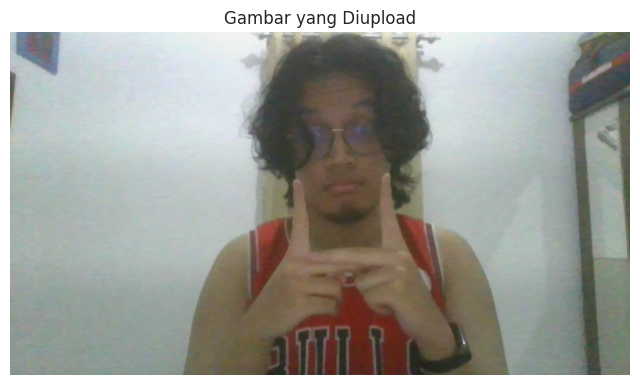


🖐️ Jumlah tangan terdeteksi: 2

📍 Koordinat Landmark (Ternormalisasi):

left_0_x = 0.0000, left_0_y = 0.0000, left_0_z = 0.0000
left_1_x = 0.0128, left_1_y = -0.0552, left_1_z = -0.0015
left_2_x = 0.0494, left_2_y = -0.0979, left_2_z = -0.0140
left_3_x = 0.0860, left_3_y = -0.1064, left_3_z = -0.0268
left_4_x = 0.1101, left_4_y = -0.1073, left_4_z = -0.0385
left_5_x = 0.0337, left_5_y = -0.1532, left_5_z = -0.0400
left_6_x = 0.0434, left_6_y = -0.2389, left_6_z = -0.0638
left_7_x = 0.0468, left_7_y = -0.3059, left_7_z = -0.0817
left_8_x = 0.0475, left_8_y = -0.3576, left_8_z = -0.0946
left_9_x = 0.0310, left_9_y = -0.1243, left_9_z = -0.0501
left_10_x = 0.0892, left_10_y = -0.1411, left_10_z = -0.0702
left_11_x = 0.1239, left_11_y = -0.1346, left_11_z = -0.0764
left_12_x = 0.1453, left_12_y = -0.1316, left_12_z = -0.0822
left_13_x = 0.0336, left_13_y = -0.0762, left_13_z = -0.0584
left_14_x = 0.1015, left_14_y = -0.0650, left_14_z = -0.0706
left_15_x = 0.1026, left_15_y = -0.0386, lef

In [40]:
# Fungsi utama
def main():
    # Upload gambar
    uploaded = files.upload()
    if not uploaded:
        print("❌ Tidak ada gambar diupload.")
        return

    file_name = list(uploaded.keys())[0]
    image = cv2.imread(file_name)
    display_image(image)

    # Gunakan MediaPipe Hands untuk mengetahui jumlah tangan
    with mp_hands.Hands(static_image_mode=True, max_num_hands=2) as hands:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = hands.process(image_rgb)
        num_hands = len(results.multi_hand_landmarks) if results.multi_hand_landmarks else 0

    print(f"\n🖐️ Jumlah tangan terdeteksi: {num_hands}")

    # Ekstraksi landmark menggunakan fungsi kamu
    if num_hands == 1:
        landmark_vector = extract_landmarks(image, is_one_hand=True)
    elif num_hands == 2:
        landmark_vector = extract_landmarks(image, is_one_hand=False)
    else:
        landmark_vector = None

    if landmark_vector:
        # Tampilkan koordinat normalisasi
        coords = np.array(landmark_vector).reshape(-1, 3)
        print("\n📍 Koordinat Landmark (Ternormalisasi):\n")
        for i in range(21):
            print(f"left_{i}_x = {coords[i][0]:.4f}, left_{i}_y = {coords[i][1]:.4f}, left_{i}_z = {coords[i][2]:.4f}")
        for i in range(21, 42):
            j = i - 21
            print(f"right_{j}_x = {coords[i][0]:.4f}, right_{j}_y = {coords[i][1]:.4f}, right_{j}_z = {coords[i][2]:.4f}")

        top3_cnn, top3_dnn = predict_gesture(landmark_vector)

        print("\n🧠 Hasil Prediksi Gesture:")
        print("\n🔹 CNN Model:")
        for label, conf in top3_cnn:
            print(f"   - {label} ({conf:.2f}%)")

        print("\n🔹 DNN Model:")
        for label, conf in top3_dnn:
            print(f"   - {label} ({conf:.2f}%)")

    else:
        print("\n❌ Tidak dapat mengekstrak landmark tangan.")
        print("📌 Pastikan kondisi gambar memenuhi syarat berikut:")
        print("   - Tangan terlihat jelas dan tidak buram.")
        print("   - Pencahayaan cukup (tidak terlalu gelap atau terang).")
        print("   - Seluruh tangan (minimal satu atau dua) masuk dalam frame.")
        print("   - Latar belakang tidak terlalu ramai sehingga tangan mudah terdeteksi.")
        print("📝 Coba unggah ulang gambar dengan posisi tangan yang lebih jelas.")

# Jalankan fungsi utama
main()

In [41]:
!pip freeze > requirements.txt